In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
import random # use it for random crawling automately 
import time

In [3]:
from tqdm import tqdm, trange
# Check the progress when getting bid data crawling 

In [4]:
import re
#regular expression

In [5]:
url= "https://www.innogov.go.kr/ucms/ogp/sug/list.do?pnum=1&menuNo=300102&cateCd=&searchText=&status1Cd=&Status2Cd=&sugMonthTp=201906&orderKey=registDtDesc"

In [6]:
# get html code 
response = requests.get(url)
response
# <Response [200]> 200 = there is page / 404 = no page

<Response [200]>

In [7]:
def get_suggestion_list(pnum):
    # print(f'year_month : {year_month}, pnum: {pnum}')
    base_url = f"https://www.innogov.go.kr/ucms/ogp/sug/list.do?pnum={pnum}&menuNo=300102&cateCd=&searchText=&status1Cd=&Status2Cd=&sugMonthTp=201906&orderKey=registDtDesc"
    # base_url 페이지를 받아온다.
    response = requests.get( base_url )
    # status_code 가 200 OK 일 때 아래의 코드를 실행한다.
    if response.status_code == 200:
        # 웹페이지의 내용을 가져왔다면 뷰티풀숩을 통해 html 태그를 가져온다.
        html = bs(response.text, 'html.parser')
        # html 태그 내용 중 아래의 selector를 통해 목록에 있는 다른 게시글을 가져오도록 한다.
        tags = html.select('#content > div.suggestion_list > ul')[0].find_all('a')
        # tags 의 내용이 없다면 suggestion_list 를 반환한다.
        if not tags :
            return(suggestion_list)
        else :
            # tags 에서 다른 게시글을 가져와 suggestion_list 에 담아준다.
            for tag in tags:
                suggestion_list.append(tag['href'])
        pnum += 1
        # 페이지번호를 하나씩 더해서 재귀호출을 합니다.
        get_suggestion_list(pnum)
        print(pnum)
    else:
        return(suggestion_list)

In [8]:
# 목록 리스트에 있는 url를 넘겨주면 내용을 크롤링 해옵니다.
def get_suggestion_content(last_webpage):
    article = []
    
    sgId = int(last_webpage.split('=')[2])
    for id_num in tqdm(range(1, sgId +1)):
        records = []
        url = "https://www.innogov.go.kr/ucms/ogp/sug/view.do?menuNo=300102&sgId={0}".format(id_num)
        response = requests.get(url)
        html = bs(response.text, 'html.parser')
        if len(html.select('#content > div.vveiw_box1 > dl > dt')) > 0:
            # 제목을 가져옵니다.
            html.select('#content > div.vveiw_box1 > dl > dt')
            title = html.select('#content > div.vveiw_box1 > dl > dt')[0].get_text(strip=True)
            # dd 태그에 있는 내용을 가져와서 카테고리, 시작일, 마감일, 제안인 정보를 추출합니다.
            desc = html.select(
                '#content > div.vveiw_box1 > div.vveiw_name > ul > li > dl > dd')
            category = desc[0].get_text(strip=True)
            content = html.select(
                '#content > div.vveiw_box1 > div.vveiw_cont > div > pre')[0].get_text(strip=True)
            #content > div.vveiw_box1 > div.vveiw_cont > div > pre > p
            start = desc[1].get_text(strip=True)
            end = desc[2].get_text(strip=True)
            author = desc[3].get_text(strip=True)
            # 추천인원을 가져옵니다.
            vote = html.select('#counter')[0].get_text(strip=True)
            #counter
     

            records.append(id_num)
            records.append(title)
            records.append(category)
            records.append(content)
            records.append(start)
            records.append(end)
            records.append(vote)
            records.append(author)
            article.append(records)

    return article

In [9]:
# check the last page 
last_webpage = "https://www.innogov.go.kr/ucms/ogp/sug/view.do?menuNo=300102&sgId=217"
sgId = int(last_webpage.split('=')[2])


In [10]:
# Need to get last page
article = []
for id_num in tqdm(range(1,sgId + 1)):
    records = []
    url = "https://www.innogov.go.kr/ucms/ogp/sug/view.do?menuNo=300102&sgId={0}".format(id_num)
    response = requests.get(url)
    html = bs(response.text, 'html.parser')
    if len(html.select('#content > div.vveiw_box1 > dl > dt')) > 0:
        # 제목을 가져옵니다.
        html.select('#content > div.vveiw_box1 > dl > dt')
        title = html.select('#content > div.vveiw_box1 > dl > dt')[0].get_text(strip=True)
        # dd 태그에 있는 내용을 가져와서 카테고리, 시작일, 마감일, 제안인 정보를 추출합니다.
        desc = html.select('#content > div.vveiw_box1 > div.vveiw_name > ul > li > dl > dd')
        category = desc[0].get_text(strip=True)
        content = html.select('#content > div.vveiw_box1 > div.vveiw_cont > div > pre')[0].get_text(strip=True)
        #content > div.vveiw_box1 > div.vveiw_cont > div > pre > p
        start = desc[1].get_text(strip=True)
        end = desc[2].get_text(strip=True)
        author = desc[3].get_text(strip=True)
        # 추천인원을 가져옵니다.
        vote = html.select('#counter')[0].get_text(strip=True)
        #counter
        records.append(id_num)
        records.append(title)
        records.append(category)
        records.append(content)
        records.append(start)
        records.append(end)
        records.append(vote)
        records.append(author)
        article.append(records)

100%|██████████| 217/217 [06:28<00:00,  1.83s/it]


In [11]:
import pandas as pd
df_suggestion=pd.DataFrame(article)
columns = ["sgID","title","category","content", "start", "end", "vote","author"]
df_suggestion.columns = columns

In [12]:
# save suggesion file as csv
df_suggestion.to_csv("df_suggestion")

In [13]:
# load suggestion data
df_suggestion = pd.read_csv("df_suggestion", index_col = 0) 

In [14]:
df_suggestion.describe()['vote']

count     178.000000
mean       43.539326
std       218.786228
min         0.000000
25%         2.000000
50%         4.000000
75%         7.750000
max      2037.000000
Name: vote, dtype: float64

In [15]:
# Hot topic
df_suggestion.loc[df_suggestion['vote'] == 2037]

,sgID,title,category,content,start,end,vote,author
56,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2018.10.02,2018.12.30,2037,엄마란소리


In [16]:
### Analysis

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프의 스타일을 지정
plt.style.use('ggplot')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14})

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 

# 주피터 노트북 안에서 그래프가 표시되도록 함
%matplotlib inline


In [18]:
df = df_suggestion

In [19]:
df.shape

(178, 8)

In [20]:
df.tail(10)

,sgID,title,category,content,start,end,vote,author
168,205,조부모 아이돌봄 수당 지급,보건복지,조부모 아이돌봄 수당 지급□도입배경○우리나라의 저출산 문제가 심화되고 있는데 경제적...,2019.06.15,2019.09.12,11,혁신리더
169,206,빌딩 화장실,안전,상가 건물이나 기타 영업용 빌딩을 건축할 때 화장실은 제발 남녀 같이 사용하는 화장...,2019.06.16,2019.09.13,4,써니 86
170,207,육아시간 사용 관련 건의,보건복지,국가공무원 복무규정 제20조(특별휴가)제5항은5세 이하의 자녀가 있는 공무원은 자녀...,2019.06.20,2019.09.17,1,청운
171,208,국민참여혁신제안 내용을 조회한 인원 수를 표기 해주세요.,기타,"처음 들어와서 개요를 읽고 제안에 대해 추천을 할지여부를 검토하는 과정에서, 제안 ...",2019.06.20,2019.09.17,5,쿨하게살자
172,209,"맑은하늘, 가족들이 즐겁게 나들이",환경,"맑은하늘, 가족들이 즐겁게 나들이 할 수 있는환경인 대한민국이 되었으면 좋겠어요미세...",2019.06.21,2019.09.18,1,선진
173,210,어린이집교사 근무환경개선,환경,어린이집교사 처우 개선에 대해 개인적인 생각 ( 그냥 생각나는데로 써보겠습니다)저는...,2019.06.22,2019.09.19,4,꾸꾸바라기
174,214,연가 기부제 도입,일반행정,아이 낳아 키우기 힘든 세상입니다.맞벌이 부부의 육아가 매우 힘듭니다.아이가 잦은 ...,2019.06.24,2019.09.21,6,탱크
175,215,"중앙부처 및 산하기관에서 추진하는 공모사업, 지원 사업을 한곳에서 볼 수 있게 해 ...",국민참여,정부 각 부처에서는 훌륭한 공모사업이나 지원사업들을 많이 하고 있습니다.이런 내용을...,2019.06.24,2019.09.21,54,희동이
176,216,공시송달 의뢰공문의 전국배포를 중단하여 문서로 인한 스트레스 해소와 행정업무 효율성 증대,일반행정,"[현황 및 문제점]​0.행정절차법 제14조4항,지방세기본법 제33조2항에서는 공시송...",2019.06.27,2019.09.24,5,민첩지킴이
177,217,근린공원,환경,포천시 근린공원 정책에 대해 정보제공과 주민간 의견수렴 과정이 있으면 좋겠습니다,2019.06.28,2019.09.25,1,저녁하늘


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 8 columns):
sgID        178 non-null int64
title       178 non-null object
category    178 non-null object
content     176 non-null object
start       178 non-null object
end         178 non-null object
vote        178 non-null int64
author      175 non-null object
dtypes: int64(2), object(6)
memory usage: 12.5+ KB


In [22]:
df.describe(include="all")

,sgID,title,category,content,start,end,vote,author
count,178.000000,178,178,176,178,178,178.000000,175
unique,NaN,178,11,176,112,112,NaN,135
top,NaN,휠체어 이용하는 환자 장애인 택시 이용 가능하도록 개선,보건복지,(문제점)현제의 어린이 보호구역은 학교주변만을 보고하고 있으며 이곳에는 선생님 경찰...,2019.06.12,2019.09.09,NaN,생태조성
freq,NaN,1,29,1,10,10,NaN,10
mean,111.005618,NaN,NaN,NaN,NaN,NaN,43.539326,NaN
std,65.670337,NaN,NaN,NaN,NaN,NaN,218.786228,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,52.250000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,123.500000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
75%,168.750000,NaN,NaN,NaN,NaN,NaN,7.750000,NaN


In [23]:
df['category'].value_counts()

보건복지     29
일반행정     29
기타       26
안전       22
인권/평등    16
환경       12
상생협력     11
국민참여     10
사회통합      8
반부패청렴     8
공동체       7
Name: category, dtype: int64

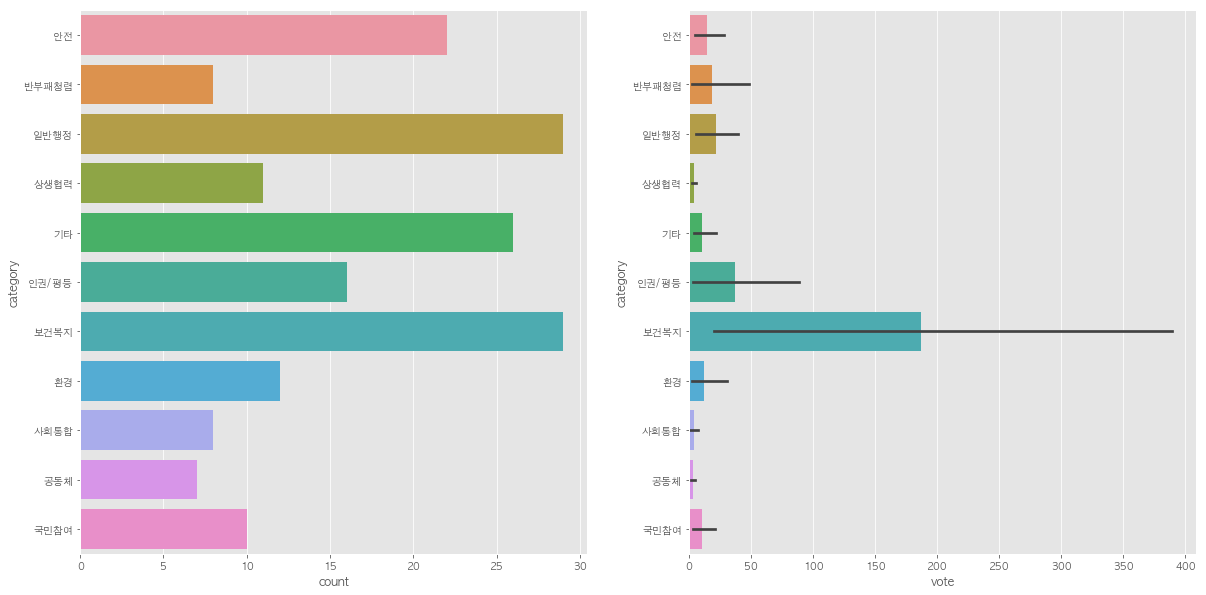

In [24]:
figure,(ax1, ax2) = plt.subplots(1, 2)
figure.set_size_inches(20,10)
# 카테고리별 제안수
sns.countplot(data=df, y="category", ax=ax1)
# 카테고리별 평균 투표수
sns.barplot(data=df, x="vote", y="category", ax=ax2)

In [25]:
df_vote_200 = df[df["vote"] < 200]
df_vote_200

,sgID,title,category,content,start,end,vote,author
0,1,어린이집 차량내 어린이 질식사고 등에 대한 상세한 대책이 필요하다.,안전,"최근 동두천 어린이집 차량내 어린이 질식사고가 발생하여, 이에 대한 여러가지 대책을...",2018.07.24,2018.08.23,14,헌비
1,2,공무원 전입시험의 투명성 확보방안,반부패청렴,현직 공무원들의 타기관이나 상급기관에 전입시험시투명성을 높이는 방안을 마련했으면 합...,2018.08.01,2018.08.31,7,음지가양지된다
2,3,경력증명을 위한 경력등록(은행)제도 시행,일반행정,"○문제점-모든 기관(국가,민간)에 사업,채용지원,이력증빙서류로“경력증명서”를 요구하...",2018.08.02,2018.09.01,4,옹성산
3,4,“일거리” 매칭 사이트를 개설하여 “일자리” 창출 연계,상생협력,○문제점-최근(2018.05)취업자 증가폭이10만명 밑으로 추락했다고 한다.글로벌 ...,2018.08.02,2018.09.01,4,옹성산
4,5,철도 및 고속도로변 유휴지에 태양전지판 설치,기타,에너지 부존자원 국가인 우리나라에서 국토를 좀 더 효율적으로 활용하여 미래의 무공해...,2018.08.03,2018.09.02,8,지고기
5,6,"난민법, 무사증, NAP 폐지하고, 외국인 의료혜택과 교육비 지급을 중단해주십시오",인권/평등,"불법난민과 불법체류자, 외노자들에 의해 자국민에 대한 역차별이 일어나고 있습니다.자...",2018.08.03,2018.09.02,119,홍차
6,7,하계 반바지 허용 등 근무복장 자율화를 통한 생산적인 근무환경 조성,일반행정,1. 올해 계속되는 폭음으로 인하여 직장에서는 근무 의욕이 떨어지고 불쾌지수가 높아...,2018.08.06,2018.09.05,5,통혁신
7,8,렌트카 과속위반 과태료부과시 임대계약서 정보확인,일반행정,지난 2018년 7월 20일 경찰서로부터 체납과태료 납부 안내를 통지받았습니다.부과...,2018.08.06,2018.09.05,3,n2si
8,10,"불법 체류자, 외국인 근로자를 제한하고, 대한민국 국민의 일자리를 보호해 주십시오.",기타,<현재 불법 체류자. 외국인 근로자 급증이 사회적 문제로 떠오르고 있습니다.>현재 ...,2018.08.06,2018.09.05,132,대한민국만세
9,11,동네치안에 관하여,안전,﻿각지자체나 광역시에 경찰인원이 부족합니다동네에 골목을 지나치려면 젊은 학생들이 담...,2018.08.07,2018.09.06,9,청렴


In [26]:
df.groupby(
    ['category'])['vote'].sum().reset_index().sort_values('vote', ascending=False)
# reset_index() => Do reset_index and change it as data frame !! 

,category,vote
4,보건복지,5426
9,일반행정,634
8,인권/평등,600
7,안전,314
2,기타,282
3,반부패청렴,149
10,환경,147
1,국민참여,102
6,상생협력,44
5,사회통합,30


In [27]:
# 카테고리별 전체 투표수
df_category_vote = pd.DataFrame(df.groupby(['category'])['vote'].sum()) \
                            .reset_index().sort_values('vote', ascending=False)
df_category_vote

,category,vote
4,보건복지,5426
9,일반행정,634
8,인권/평등,600
7,안전,314
2,기타,282
3,반부패청렴,149
10,환경,147
1,국민참여,102
6,상생협력,44
5,사회통합,30


In [28]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

df[['start', 'end']].head()

,start,end
0,2018-07-24,2018-08-23
1,2018-08-01,2018-08-31
2,2018-08-02,2018-09-01
3,2018-08-02,2018-09-01
4,2018-08-03,2018-09-02


In [29]:
df.dtypes

sgID                 int64
title               object
category            object
content             object
start       datetime64[ns]
end         datetime64[ns]
vote                 int64
author              object
dtype: object

In [30]:
df['start-date'] = df['start'].dt.date
df['start-month'] = df['start'].dt.year.astype(str) +"-"+ df['start'].dt.month.astype(str)
df['start-weekday'] = df['start'].dt.weekday # dt.dayofweek = dt.weekday

In [31]:
weekday_map= {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}
df['weekday'] = df['start-weekday'].apply(lambda x : weekday_map[x])
df[['start-month', 'start-weekday', 'weekday']].head()

,start-month,start-weekday,weekday
0,2018-7,1,화
1,2018-8,2,수
2,2018-8,3,목
3,2018-8,3,목
4,2018-8,4,금


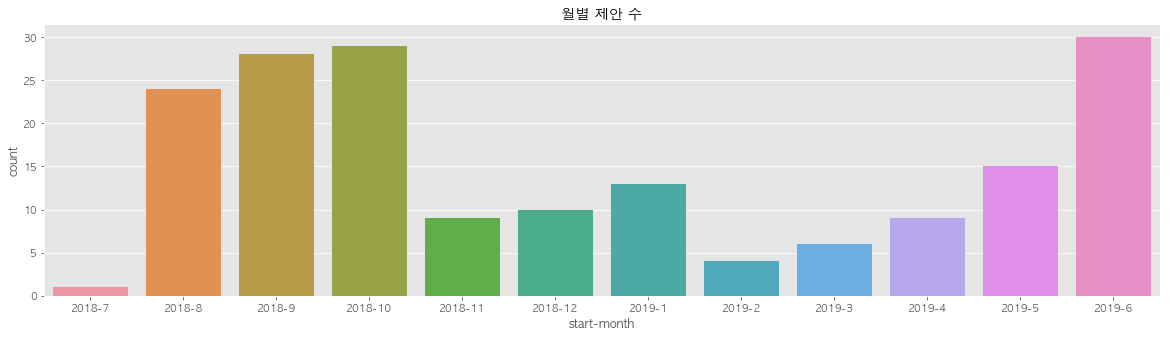

In [32]:
plt.figure(figsize=(20,5))
plt.title('월별 제안 수')
sns.countplot(data=df.sort_values(by="start-date", ascending=True), x="start-month")

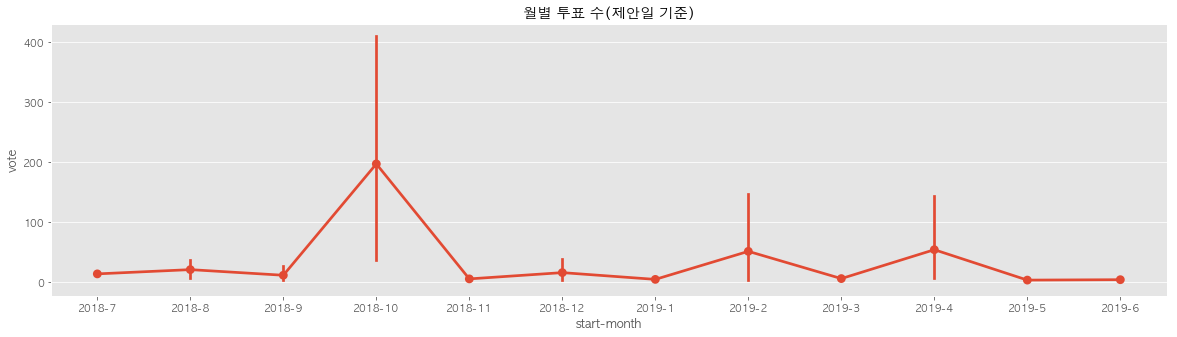

In [33]:
plt.figure(figsize=(20,5))
plt.title('월별 투표 수(제안일 기준)')
sns.pointplot(data=df.sort_values(by="start-date", ascending=True), x="start-month", y="vote")

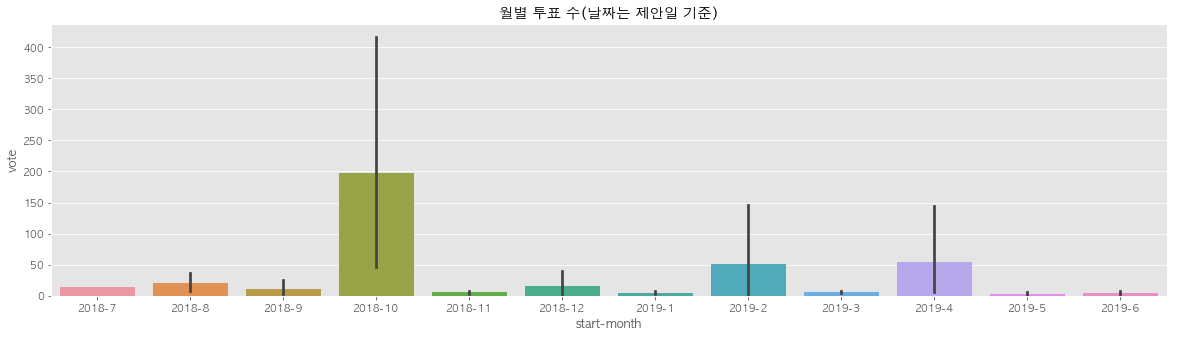

In [34]:
plt.figure(figsize=(20,5))
plt.title('월별 투표 수(날짜는 제안일 기준)')
sns.barplot(data=df.sort_values(by="start-date", ascending=True), x="start-month", y="vote")

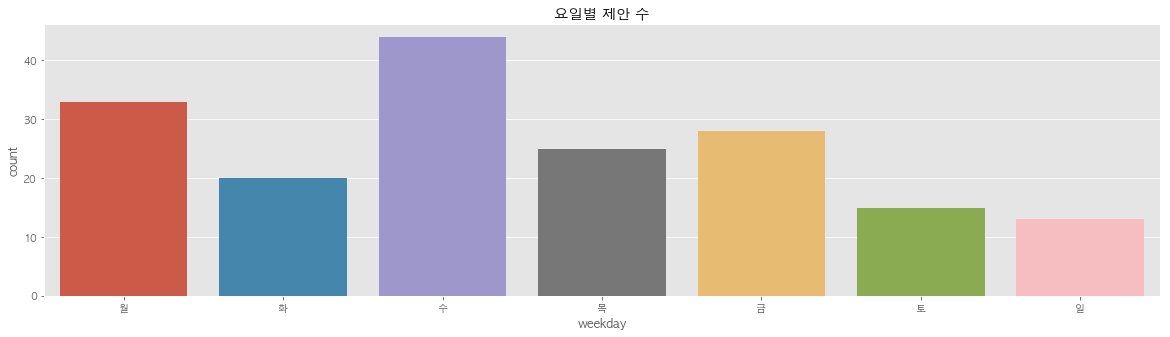

In [35]:
plt.figure(figsize=(20,5))
plt.title('요일별 제안 수')
sns.countplot(data=df.sort_values(by="start-weekday"), x="weekday") # sort_values(by="start-weekday")

In [53]:
#df.sort_values(by="start-weekday")

,sgID,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
0,1,어린이집 차량내 어린이 질식사고 등에 대한 상세한 대책이 필요하다.,안전,"최근 동두천 어린이집 차량내 어린이 질식사고가 발생하여, 이에 대한 여러가지 대책을...",2018-07-24,2018-08-23,14,헌비,2018-07-24,2018-7,1,화,True
1,2,공무원 전입시험의 투명성 확보방안,반부패청렴,현직 공무원들의 타기관이나 상급기관에 전입시험시투명성을 높이는 방안을 마련했으면 합...,2018-08-01,2018-08-31,7,음지가양지된다,2018-08-01,2018-8,2,수,True
2,3,경력증명을 위한 경력등록(은행)제도 시행,일반행정,"○문제점-모든 기관(국가,민간)에 사업,채용지원,이력증빙서류로“경력증명서”를 요구하...",2018-08-02,2018-09-01,4,옹성산,2018-08-02,2018-8,3,목,True
3,4,“일거리” 매칭 사이트를 개설하여 “일자리” 창출 연계,상생협력,○문제점-최근(2018.05)취업자 증가폭이10만명 밑으로 추락했다고 한다.글로벌 ...,2018-08-02,2018-09-01,4,옹성산,2018-08-02,2018-8,3,목,True
4,5,철도 및 고속도로변 유휴지에 태양전지판 설치,기타,에너지 부존자원 국가인 우리나라에서 국토를 좀 더 효율적으로 활용하여 미래의 무공해...,2018-08-03,2018-09-02,8,지고기,2018-08-03,2018-8,4,금,True
5,6,"난민법, 무사증, NAP 폐지하고, 외국인 의료혜택과 교육비 지급을 중단해주십시오",인권/평등,"불법난민과 불법체류자, 외노자들에 의해 자국민에 대한 역차별이 일어나고 있습니다.자...",2018-08-03,2018-09-02,119,홍차,2018-08-03,2018-8,4,금,True
6,7,하계 반바지 허용 등 근무복장 자율화를 통한 생산적인 근무환경 조성,일반행정,1. 올해 계속되는 폭음으로 인하여 직장에서는 근무 의욕이 떨어지고 불쾌지수가 높아...,2018-08-06,2018-09-05,5,통혁신,2018-08-06,2018-8,0,월,True
7,8,렌트카 과속위반 과태료부과시 임대계약서 정보확인,일반행정,지난 2018년 7월 20일 경찰서로부터 체납과태료 납부 안내를 통지받았습니다.부과...,2018-08-06,2018-09-05,3,n2si,2018-08-06,2018-8,0,월,True
8,10,"불법 체류자, 외국인 근로자를 제한하고, 대한민국 국민의 일자리를 보호해 주십시오.",기타,<현재 불법 체류자. 외국인 근로자 급증이 사회적 문제로 떠오르고 있습니다.>현재 ...,2018-08-06,2018-09-05,132,대한민국만세,2018-08-06,2018-8,0,월,True
9,11,동네치안에 관하여,안전,﻿각지자체나 광역시에 경찰인원이 부족합니다동네에 골목을 지나치려면 젊은 학생들이 담...,2018-08-07,2018-09-06,9,청렴,2018-08-07,2018-8,1,화,True


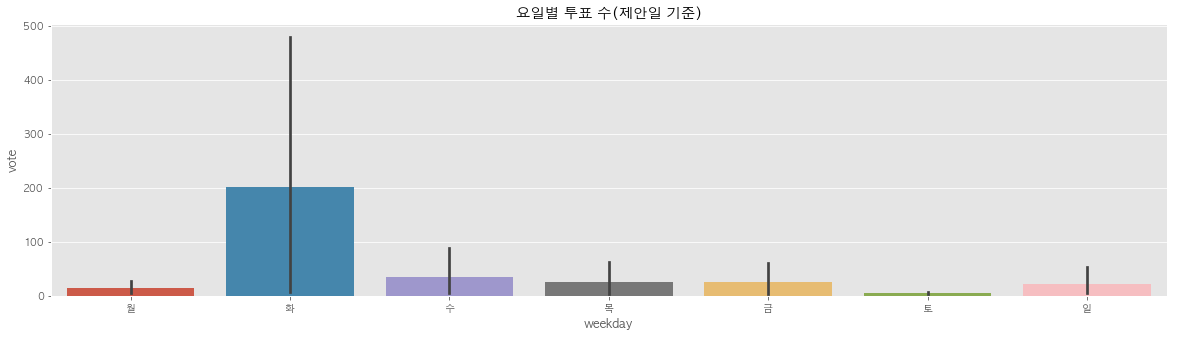

In [36]:
plt.figure(figsize=(20,5))
plt.title('요일별 투표 수(제안일 기준)')
sns.barplot(data=df.sort_values(by="start-weekday"), x="weekday", y="vote")

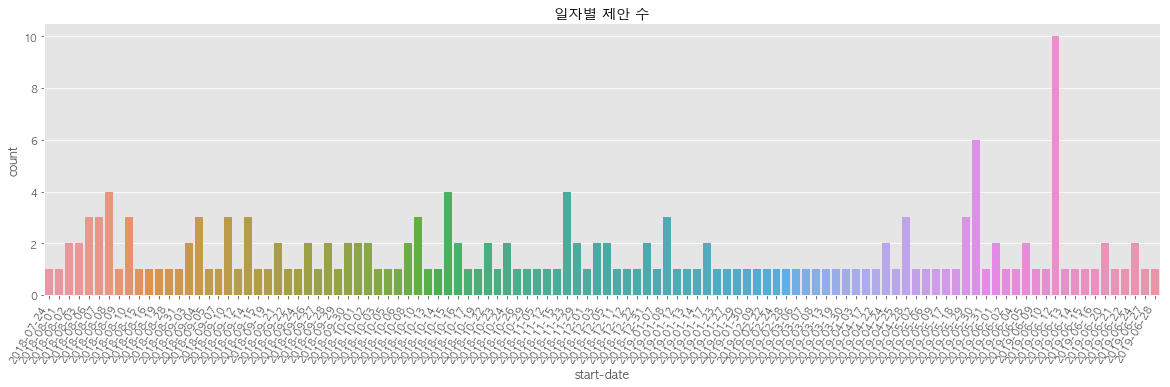

In [37]:
plt.figure(figsize=(20,5))
plt.title('일자별 제안 수')
plt.xticks(rotation=60, ha='right') # x label customized 
sns.countplot(data=df.sort_values(by="start-date"), x="start-date")

In [38]:
df_06_10 = df[df['start'] > '2019-06-10']
df_06_10['start-date'].value_counts()

2019-06-12    10
2019-06-20     2
2019-06-24     2
2019-06-21     1
2019-06-14     1
2019-06-27     1
2019-06-22     1
2019-06-13     1
2019-06-28     1
2019-06-15     1
2019-06-16     1
Name: start-date, dtype: int64

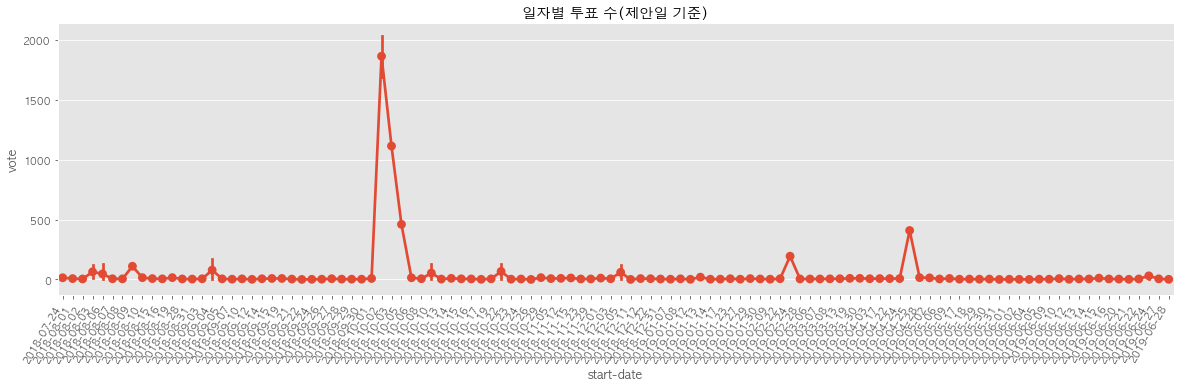

In [39]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=60, ha='right')
plt.title('일자별 투표 수(제안일 기준)')
sns.pointplot(data=df.sort_values(by="start-date"), x="start-date", y="vote")

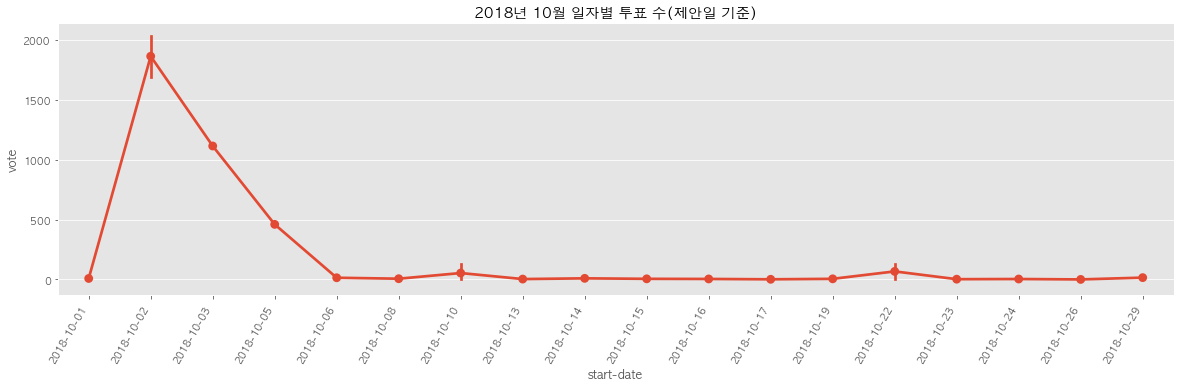

In [40]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=60, ha='right')
plt.title('2018년 10월 일자별 투표 수(제안일 기준)')
df_2018_10 = df[(df["start"] >= "2018-10-01") & (df["start"] < "2018-11-01")]
sns.pointplot(data=df_2018_10.sort_values(by="start-date"), x="start-date", y="vote")

In [41]:
df.loc[df["vote"] > 2000, ["sgId", "start", "title", "category", "content","vote"]]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,sgId,start,title,category,content,vote
56,NaN,2018-10-02,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2037


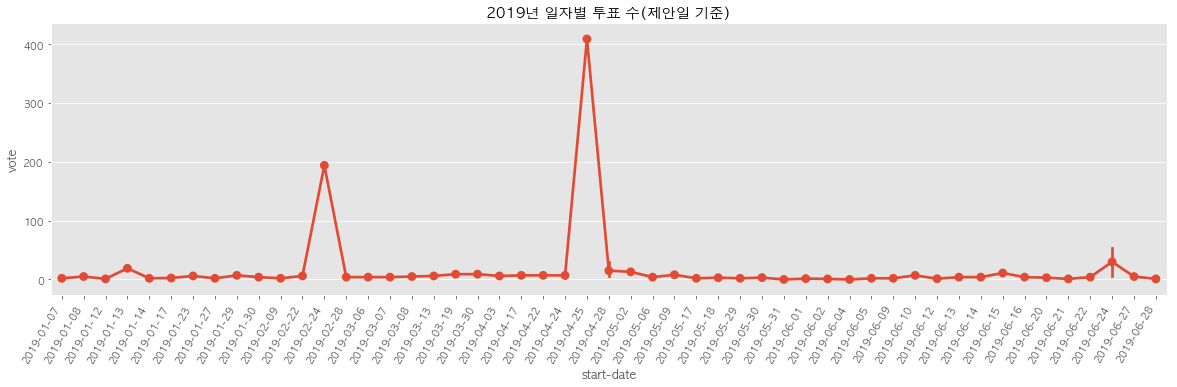

In [42]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=60, ha='right')
plt.title('2019년 일자별 투표 수(제안일 기준)')
df_2019 = df[df["start"] > '2018-12-31']
sns.pointplot(data=df_2019.sort_values(by="start-date"), x="start-date", y="vote")

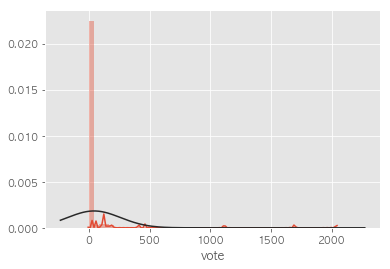

In [43]:
from scipy.stats import norm
sns.distplot(df['vote'], fit=norm)

In [44]:
# 종료된 제안 수
df[df['end'] < '2019-07-12'].shape

(125, 12)

In [45]:
# 종료 여부 컬럼 생성
df['close'] = df['end'] < '2019-06-17'
df['close'].head()

0    True
1    True
2    True
3    True
4    True
Name: close, dtype: bool

In [46]:
# 종료 여부 건 비교
df['close'].value_counts()


True     123
False     55
Name: close, dtype: int64

In [47]:
preview_columns = ["sgID", "title", "category", "content", "vote", "start"]
df_top_vote = df.sort_values(by='vote', ascending=False).head(10)
df_top_vote[preview_columns]

,sgID,title,category,content,vote,start
56,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2037,2018-10-02
55,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",1693,2018-10-02
57,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,1115,2018-10-03
58,66,유전병인 희귀병 소뇌위축증 환우들을 도와주세요,보건복지,안녕하세요 저희 외갓집 어른들이 앓고 있는 소뇌위축증을알려드리려합니다.총 6남매중 ...,460,2018-10-05
129,165,공무원도 근로자입니다. 5월 1일 근로자의 날 공무원도 쉴 수 있도록 해주십시오.,인권/평등,1.근로자의 날(5월1일)은 세계적으로May-day로 기념하며 노동시간 기준을8시간...,409,2019-04-25
116,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,194,2019-02-24
28,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,167,2018-09-04
75,85,올바른 119신고의 중요성과 신고방법 교육 의무화,안전,안녕하세요!현재 시민안전파수꾼 청년 애드보케트라는 활동을 하면서 시민들의 초기대응능...,133,2018-10-22
8,10,"불법 체류자, 외국인 근로자를 제한하고, 대한민국 국민의 일자리를 보호해 주십시오.",기타,<현재 불법 체류자. 외국인 근로자 급증이 사회적 문제로 떠오르고 있습니다.>현재 ...,132,2018-08-06
63,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,126,2018-10-10


In [48]:
df_vote_100 = df.loc[df['vote'] > 100, preview_columns]
print('100개 이상 투표를 받은 제안 :', len(df_vote_100))
df_vote_100

100개 이상 투표를 받은 제안 : 13


,sgID,title,category,content,vote,start
5,6,"난민법, 무사증, NAP 폐지하고, 외국인 의료혜택과 교육비 지급을 중단해주십시오",인권/평등,"불법난민과 불법체류자, 외노자들에 의해 자국민에 대한 역차별이 일어나고 있습니다.자...",119,2018-08-03
8,10,"불법 체류자, 외국인 근로자를 제한하고, 대한민국 국민의 일자리를 보호해 주십시오.",기타,<현재 불법 체류자. 외국인 근로자 급증이 사회적 문제로 떠오르고 있습니다.>현재 ...,132,2018-08-06
16,19,"기후변화에 대한 능동적 대응과 국가 산업생태계 조성을 위한, 마중물 필요",환경,"○ 기후변화대응지수(CCPI) 2018, 검토 결과 한국 58위(60개국 중) "" ...",110,2018-08-09
28,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,167,2018-09-04
55,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",1693,2018-10-02
56,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2037,2018-10-02
57,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,1115,2018-10-03
58,66,유전병인 희귀병 소뇌위축증 환우들을 도와주세요,보건복지,안녕하세요 저희 외갓집 어른들이 앓고 있는 소뇌위축증을알려드리려합니다.총 6남매중 ...,460,2018-10-05
63,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,126,2018-10-10
75,85,올바른 119신고의 중요성과 신고방법 교육 의무화,안전,안녕하세요!현재 시민안전파수꾼 청년 애드보케트라는 활동을 하면서 시민들의 초기대응능...,133,2018-10-22


In [49]:
# 가장 많은 건 수가 있는 일반행정 분야의 제안을 투표수 별로 정렬해서 봅니다.
df[df['category'] == '일반행정'].sort_values(
    by='vote', ascending=False).head()

,sgID,title,category,content,start,end,vote,author,start-date,start-month,start-weekday,weekday,close
116,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,2019-02-24,2019-05-24,194,무한소,2019-02-24,2019-2,6,일,True
28,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,2018-09-04,2018-12-02,167,NaN,2018-09-04,2018-9,1,화,True
63,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,2018-10-10,2019-01-07,126,안전역량,2018-10-10,2018-10,2,수,True
64,72,정부부처 공모사업을 한눈에 보고싶습니다.,일반행정,저는 지자체에서 혁신업무 및 기획업무를 담당하고있습니다.작은 지방이라 공모사업 선정...,2018-10-10,2019-01-07,33,혁신선두,2018-10-10,2018-10,2,수,True
146,182,가업상속제도 이대로 좋은가?,일반행정,"[ 가업상속제도 이대로 좋은가? ]''매출액 3,000억원 미만 기업에 적용하는 가...",2019-05-30,2019-08-27,10,hyusco,2019-05-30,2019-5,3,목,False


In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def displayWordCloud(data = None, backgroundcolor = 'white', width=1600, height=800):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/AppleGothic.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [51]:
from konlpy.tag import Mecab
mecab = Mecab()

ModuleNotFoundError: No module named 'konlpy'

In [ ]:
import re
p = r'.*(난임|불임|임신).*'
pregnant = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]


In [ ]:
pregnant.sort_values(by="vote", ascending=False)

In [ ]:
p = r'.*(미세먼지).*'
air = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
air

In [ ]:
p = r'.*(자동차).*'
car = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
car

In [ ]:
#100개 이상의 투표를 받은 제안
content = df_vote_100["content"]
content